In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold
from sklearn.metrics import confusion_matrix, classification_report,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.feature_selection import RFECV


%matplotlib inline

In [2]:

data_train = pd.read_csv('training set.csv') 
X = data_train.iloc[:, 1:15]
x1 = data_train.iloc[0:, 1:8]  #Only element content as features
y = data_train.iloc[0:, 15:16] #label


data_test = pd.read_csv('test set.csv') #The address for reading data needs to be modified.
xtest = data_test.iloc[:, 1:15]
x2 = data_test.iloc[:, 1:8]  #Only element content as features
ytest = data_test.iloc[:, 15:16] #label

In [3]:
xcols= X[['anum', 'Ven',
       'avg Ven', 'En', 'Arc', 'mass']]

In [4]:
cv5=KFold(n_splits=5)

In [5]:
# def polt_parity2(y_cv_test,y_pred_test, y_cv_train=None,y_pred_train=None, label=None, ylim=[50,900]):
#     """
#     Function to make parity plots.
#     """
    
#     # Plot Parity plot
#     rmse_test = np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
#     r2_test = r2_score(y_cv_test,y_pred_test)
    
#     if y_cv_train is None:
#         fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4), sharey=True, sharex=True)
#     else:
#         fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
        
#     ax1.scatter(y_cv_test,y_pred_test)
#     ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)    
#     ax1.text(0.95, 0.18, "RMSE: %.2f"%rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
#     ax1.text(0.95, 0.1, "R$^2$: %.2f"%r2_test, transform=ax1.transAxes, ha='right', fontsize=14)    
#     ax1.plot(ylim, ylim, '--k')
#     ax1.set_xlabel('True y', fontsize=14)
#     ax1.set_ylabel('Pred y', fontsize=14)
#     ax1.set_xlim(ylim[0],ylim[1])
#     ax1.set_ylim(ylim[0],ylim[1])    
    
#     if y_cv_train is not None: 
#         rmse_train = np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
#         r2_train = r2_score(y_cv_train,y_pred_train)
        
#         ax2.scatter(y_cv_train,y_pred_train, c='m')
#         ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)        
#         ax2.text(0.95, 0.18, "RMSE: %.2f"%rmse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
#         ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
#         ax2.plot(ylim, ylim, '--k')

#         ax2.set_xlabel('True y', fontsize=14)    
#         ax2.set_xlim(ylim[0],ylim[1])
#         ax2.set_ylim(ylim[0],ylim[1])    

#     plt.tight_layout()
#     plt.show()
    
#     return None

In [11]:


def polt_parity2(y_cv_test, y_pred_test, y_cv_train=None, y_pred_train=None, label=None, ylim=[50, 900], test_color='blue', train_color='green'):
    """
    Function to make parity plots.
    """
    
    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    r2_test = r2_score(y_cv_test, y_pred_test)
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharey=True, sharex=True)
        
    ax1.scatter(y_cv_test, y_pred_test, color=test_color, alpha=0.5, label='Test Data')
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "RMSE: %.2f" % rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f" % r2_test, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot(ylim, ylim, '--k', label='Ideal')
    ax1.set_xlabel('Actual T$_m$', fontsize=14)
    ax1.set_ylabel('Predicted T$_m$', fontsize=14)
    ax1.set_xlim(ylim[0], ylim[1])
    ax1.set_ylim(ylim[0], ylim[1])    
    
    if y_cv_train is not None: 
        rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
        r2_train = r2_score(y_cv_train, y_pred_train)
        
        ax1.scatter(y_cv_train, y_pred_train, color=train_color, alpha=0.5, label='Train Data')
        ax1.plot(ylim, ylim, '--k')

    ax1.legend(loc='upper left', fontsize=10)
    plt.title('Linear', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return None


In [12]:


def polt_parity3(y_cv_test, y_pred_test, y_cv_train=None, y_pred_train=None, label=None, ylim=[50, 900], test_color='blue', train_color='green'):
    """
    Function to make parity plots.
    """
    
    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    r2_test = r2_score(y_cv_test, y_pred_test)
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharey=True, sharex=True)
        
    ax1.scatter(y_cv_test, y_pred_test, color=test_color, alpha=0.5, label='Test Data')
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "RMSE: %.2f" % rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f" % r2_test, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot(ylim, ylim, '--k', label='Ideal')
    ax1.set_xlabel('Actual T$_m$', fontsize=14)
    ax1.set_ylabel('Predicted T$_m$', fontsize=14)
    ax1.set_xlim(ylim[0], ylim[1])
    ax1.set_ylim(ylim[0], ylim[1])    
    
    if y_cv_train is not None: 
        rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
        r2_train = r2_score(y_cv_train, y_pred_train)
        
        ax1.scatter(y_cv_train, y_pred_train, color=train_color, alpha=0.5, label='Train Data')
        ax1.plot(ylim, ylim, '--k')

    ax1.legend(loc='upper left', fontsize=10)
    plt.title('Ridge', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return None


In [13]:
lr = LinearRegression(fit_intercept=False)
model = lr.fit(X,y)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


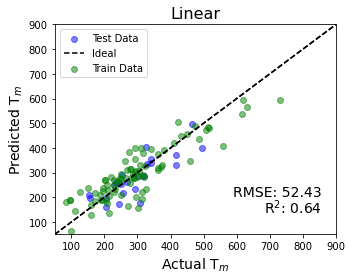

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Root Mean squared error: 52.43
Coefficient of determination: 0.64
RMSE Train :58.05
R2 Train :0.77


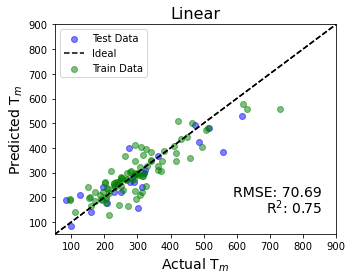

Root Mean squared error: 70.69
Coefficient of determination: 0.75
RMSE Train :57.83
R2 Train :0.77


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


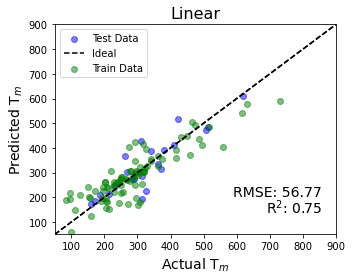

Root Mean squared error: 56.77
Coefficient of determination: 0.75
RMSE Train :57.93
R2 Train :0.77


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


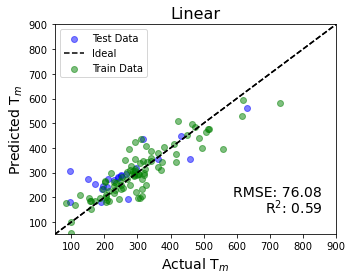

Root Mean squared error: 76.08
Coefficient of determination: 0.59
RMSE Train :60.34
R2 Train :0.75


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


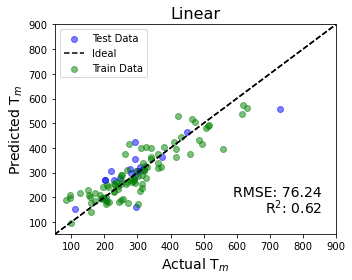

Root Mean squared error: 76.24
Coefficient of determination: 0.62
RMSE Train :59.47
R2 Train :0.76


In [14]:
errors=[]
for idx, (train,test) in enumerate(cv5.split(X)):
    X_cv_train=X.values[train]
    X_cv_test=X.values[test]
    
    y_cv_train=y.values[train]
    y_cv_test=y.values[test]
    
    model=lr.fit(X_cv_train,y_cv_train)
    y_pred = model.predict(X)
    y_pred_test=model.predict(X_cv_test)
    y_pred_train=model.predict(X_cv_train)
    
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    rmse_test=np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
    rmse_train=np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
    
    r2 = r2_score(y,y_pred)
    r2_test = r2_score(y_cv_test, y_pred_test)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    polt_parity2(y_cv_test,y_pred_test,y_cv_train,y_pred_train)
    
    print("Root Mean squared error: %.2f" % rmse_test)
    print("Coefficient of determination: %.2f" % r2_test) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test,
             'r2_cv': r2_train,
             'rmse_train':rmse,
             'r2_train':r2}

    errors.append(error)

In [15]:
errors = pd.DataFrame(errors)
errors

,kfold,rmse_cv,rmse_test,r2_test,r2_cv,rmse_train,r2_train
0,1,59.428885,52.427904,0.643474,0.782989,58.047626,0.767619
1,2,54.186807,70.688912,0.753851,0.774616,57.832858,0.769336
2,3,58.214368,56.772960,0.746416,0.767518,57.931533,0.768548
3,4,55.763438,76.080809,0.594667,0.781009,60.336392,0.748933
4,5,54.538618,76.241037,0.617620,0.791732,59.472631,0.756070


In [16]:
errors.mean()[['rmse_test','r2_test','rmse_train','r2_train','r2_cv','rmse_cv']]

rmse_test     66.442324
r2_test        0.671206
rmse_train    58.724208
r2_train       0.762101
r2_cv          0.779573
rmse_cv       56.426423
dtype: float64

## Ridge

In [17]:
lr2= Ridge(alpha=1)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


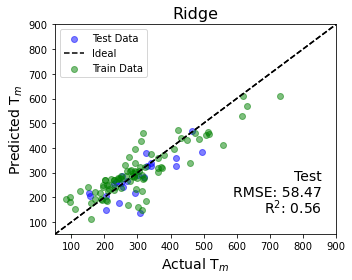

Root Mean squared error: 58.47
Coefficient of determination: 0.56
RMSE Train :62.18
R2 Train :0.73


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


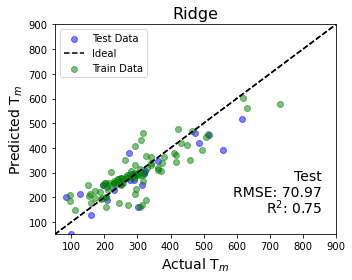

Root Mean squared error: 70.97
Coefficient of determination: 0.75
RMSE Train :61.91
R2 Train :0.74


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


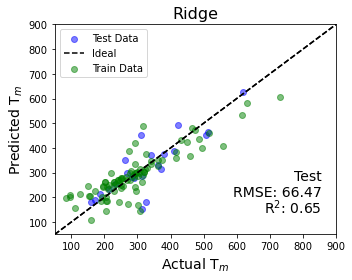

Root Mean squared error: 66.47
Coefficient of determination: 0.65
RMSE Train :61.86
R2 Train :0.74


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


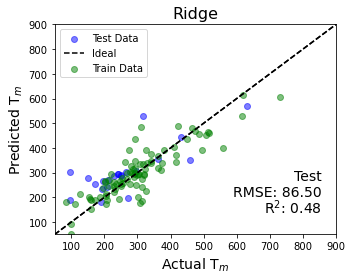

Root Mean squared error: 86.50
Coefficient of determination: 0.48
RMSE Train :64.36
R2 Train :0.71


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


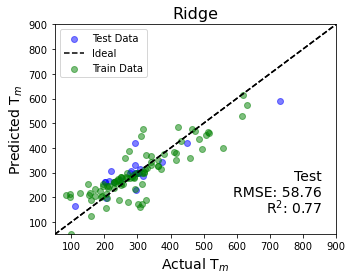

Root Mean squared error: 58.76
Coefficient of determination: 0.77
RMSE Train :61.75
R2 Train :0.74


In [18]:
error_lr2 = []
for idx, (train, test) in enumerate(cv5.split(X)):
    x_cv_train = X.values[train]
    x_cv_test = X.values[test]
    
    y_cv_train = y.values[train]
    y_cv_test = y.values[test]
    
    model = lr2.fit(x_cv_train,y_cv_train)
    y_pred = model.predict(X)
    y_pred_train = model.predict(x_cv_train)
    y_pred_test = model.predict(x_cv_test)
    
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
    
    r2 = r2_score(y,y_pred)
    r2_test = r2_score(y_cv_test, y_pred_test)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    polt_parity3(y_cv_test,y_pred_test,y_cv_train,y_pred_train,label = 'Test')
    
    print("Root Mean squared error: %.2f" % rmse_test)
    print("Coefficient of determination: %.2f" % r2_test) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2) 
                   
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test,
             'r2_cv': r2_train,
             'rmse_train':rmse,
             'r2_train':r2}
    error_lr2.append(error)

In [19]:
error_lr2 = pd.DataFrame(error_lr2)
error_lr2

,kfold,rmse_cv,rmse_test,r2_test,r2_cv,rmse_train,r2_train
0,1,63.110520,58.466141,0.556621,0.755269,62.176672,0.733384
1,2,59.454527,70.965836,0.751918,0.728665,61.906361,0.735697
2,3,60.667439,66.467177,0.652421,0.747512,61.860158,0.736092
3,4,57.591563,86.498792,0.476060,0.766415,64.360965,0.714322
4,5,62.468622,58.756261,0.772895,0.726764,61.750575,0.737026


In [20]:
error_lr2.mean()[['rmse_test','r2_test','rmse_train','r2_train']]

rmse_test     68.230841
r2_test        0.641983
rmse_train    62.410946
r2_train       0.731304
dtype: float64

## Optimzing Alpha

In [21]:
from sklearn.model_selection import GridSearchCV 

In [22]:
# c_values = [ 0.75, 1, 5, 10, 20,25,26,27,28,29,30,31,32,33,34,35,40,50,100]
c_values = np.logspace(np.log10(20),np.log(30),num = 100)

In [23]:
hyper_params = {'alpha':c_values}
lr= Ridge()
clf = GridSearchCV(lr, hyper_params, cv=5, scoring='neg_mean_squared_error')
mod = clf.fit(X,y)
mse_list=clf.cv_results_['mean_test_score']*-1

Text(0, 0.5, 'RMSE')

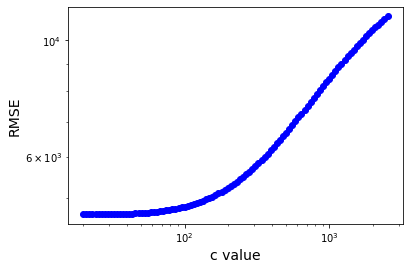

In [24]:
plt.plot(c_values, mse_list, '-bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('c value', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

In [25]:
min_idx=np.argmin(mse_list)
c_values[min_idx], mse_list[min_idx]

(28.15312959762684, 4667.331490524747)

In [26]:
alphaopt = c_values[min_idx]

In [27]:
lr_grid = Ridge(alpha = alphaopt)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


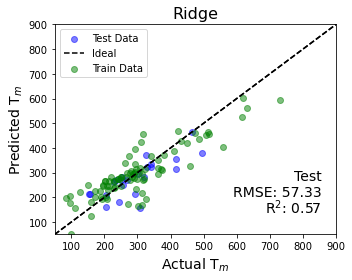

Root Mean squared error: 57.33
Coefficient of determination: 0.57
RMSE Train :62.39
R2 Train :0.73


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


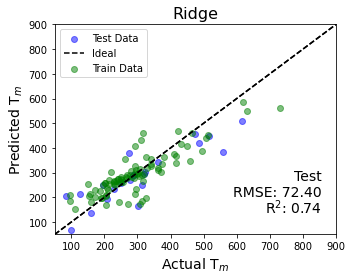

Root Mean squared error: 72.40
Coefficient of determination: 0.74
RMSE Train :62.52
R2 Train :0.73


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


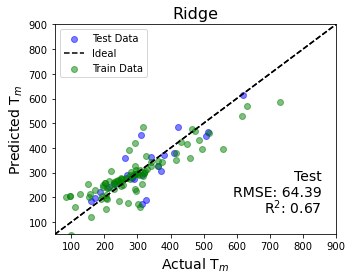

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Root Mean squared error: 64.39
Coefficient of determination: 0.67
RMSE Train :61.88
R2 Train :0.74


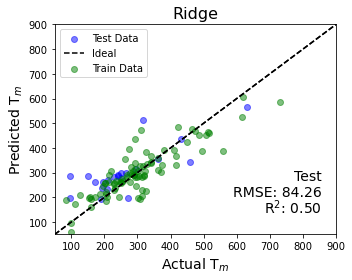

Root Mean squared error: 84.26
Coefficient of determination: 0.50
RMSE Train :64.40
R2 Train :0.71


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


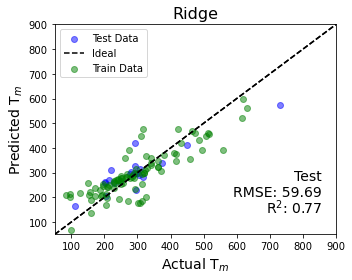

Root Mean squared error: 59.69
Coefficient of determination: 0.77
RMSE Train :62.18
R2 Train :0.73


In [28]:
errors_grid = []
for idx, (train, test) in enumerate(cv5.split(X)):
    x_cv_train = X.values[train]
    x_cv_test = X.values[test]
    
    y_cv_train = y.values[train]
    y_cv_test = y.values[test]
    
    model = lr_grid.fit(x_cv_train,y_cv_train)
    y_pred = model.predict(X)
    y_pred_train = model.predict(x_cv_train)
    y_pred_test = model.predict(x_cv_test)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
    
    r2 = r2_score(y, y_pred)
    r2_test = r2_score(y_cv_test, y_pred_test)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    polt_parity3(y_cv_test,y_pred_test,y_cv_train,y_pred_train,label = 'Test')
    
    print("Root Mean squared error: %.2f" % rmse_test)
    print("Coefficient of determination: %.2f" % r2_test)
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)    
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test,
             'r2_cv': r2_train,
             'rmse_train':rmse,
             'r2_train':r2}
    errors_grid.append(error)

In [29]:
errors_grid = pd.DataFrame(errors_grid)
errors_grid

,kfold,rmse_cv,rmse_test,r2_test,r2_cv,rmse_train,r2_train
0,1,63.645040,57.331790,0.573659,0.751106,62.389384,0.731557
1,2,59.826841,72.398360,0.741801,0.725256,62.519678,0.730434
2,3,61.240038,64.389948,0.673807,0.742723,61.877087,0.735947
3,4,58.460866,84.256964,0.502866,0.759310,64.399938,0.713976
4,5,62.784465,59.690027,0.765619,0.723994,62.183390,0.733326


In [30]:
errors_grid.mean()[['rmse_test','r2_test','rmse_train','r2_train']]

rmse_test     67.613418
r2_test        0.651551
rmse_train    62.673895
r2_train       0.729048
dtype: float64

## RFE

In [31]:
lr_rfe = Ridge(alpha = alphaopt)

In [32]:
selector = RFECV(lr_rfe, step=1, cv=5, scoring='neg_mean_squared_error')
selector = selector.fit(X,y)
sel_features = X.columns[selector.support_]

In [33]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X.columns[selector.support_])

Optimal number of features : 6
Best features : Index(['Ni', 'Sn', 'Co', 'Cu', 'Numa', 'mass'], dtype='object')


In [34]:
print("Initial number of features", selector.n_features_in_)

Initial number of features 14


In [35]:
mse_rfe = (selector.cv_results_['mean_test_score']).min()
print("Mean square error with RFE: ", mse_rfe)

Mean square error with RFE:  -11053.21186678062


In [36]:
weights = selector.estimator_.coef_
weights

array([[ 18.46281313, -23.88934834,   9.38270357, -14.64303522,
        -13.53272111, -14.60038287]])

In [37]:
order = np.argsort(-1*np.abs(weights))
order

array([[1, 0, 3, 5, 4, 2]], dtype=int64)

In [38]:
# sel_features[order]
sel_features = np.array(sel_features)
order = np.array(order)

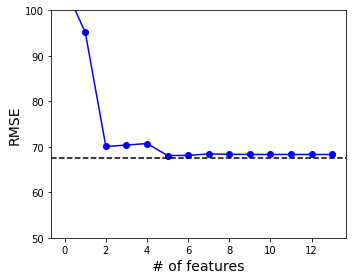

In [39]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(np.sqrt(selector.cv_results_['mean_test_score']*-1), '-bo')
ax1.axhline(errors_grid.mean()['rmse_test'], linestyle='--', color='k')
ax1.set_ylim(50,100)
ax1.set_xlabel('# of features', fontsize=14)
ax1.set_ylabel('RMSE', fontsize=14)
plt.tight_layout()

In [40]:
xtrain2 = X[sel_features]

xtrain2

,Ni,Sn,Co,Cu,Numa,mass
0,41.0,10.0,6.0,0.0,4,63.093900
1,49.0,12.0,0.0,0.0,3,64.429900
2,43.0,11.0,2.0,5.0,5,64.077500
3,42.0,10.0,0.0,0.0,3,62.892000
4,43.0,10.5,0.0,0.0,4,63.108550
...,...,...,...,...,...,...
106,42.0,10.5,0.0,0.0,3,63.210850
107,43.8,10.7,6.0,0.0,5,63.657575
108,50.0,13.0,0.0,0.0,3,65.105100
109,50.0,5.0,0.0,0.0,3,60.003500


## Optimization after RFE

In [41]:
# c_values = [ 0.75, 1,2,3,4, 5,6,7,8,9, 10, 20,25,26,27,28,29,30,31,32,33,34,35,40,50,100]
c_values = np.logspace(np.log10(2),np.log(50),num = 100)
hyper_params = {'alpha':c_values}
lr_rfe= Ridge()
clf = GridSearchCV(lr_rfe, hyper_params, cv=5, scoring='neg_mean_squared_error')
mod = clf.fit(xtrain2,y)
mse_list2=clf.cv_results_['mean_test_score']*-1

Text(0, 0.5, 'RMSE')

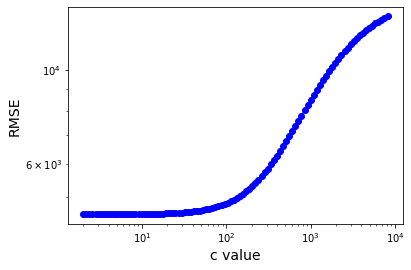

In [42]:
plt.plot(c_values, mse_list2, '-bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('c value', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

In [43]:
min_idx2=np.argmin(mse_list2)

In [44]:
c_values[min_idx2], mse_list[min_idx2]

(6.48149920044076, 4673.82253686686)

In [45]:
alphaopt2 = c_values[min_idx2]
alphaopt2

6.48149920044076

In [46]:
lr_grid2 = Ridge(alpha = alphaopt2)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


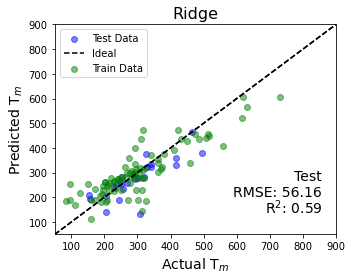

Root Mean squared error CV: 56.16
Coefficient of determination CV: 0.59
RMSE Train :62.70
R2 Train :0.73


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


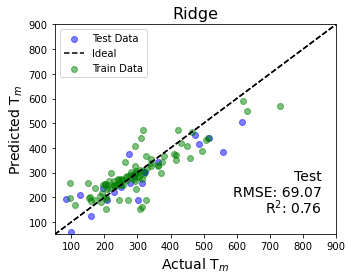

Root Mean squared error CV: 69.07
Coefficient of determination CV: 0.76
RMSE Train :62.73
R2 Train :0.73


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


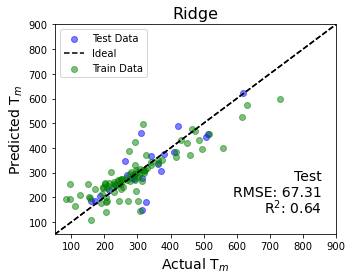

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Root Mean squared error CV: 67.31
Coefficient of determination CV: 0.64
RMSE Train :62.50
R2 Train :0.73


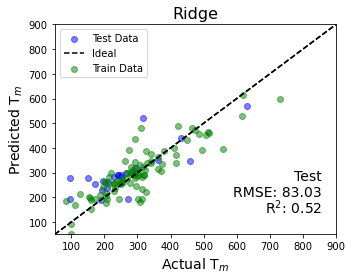

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Root Mean squared error CV: 83.03
Coefficient of determination CV: 0.52
RMSE Train :63.71
R2 Train :0.72


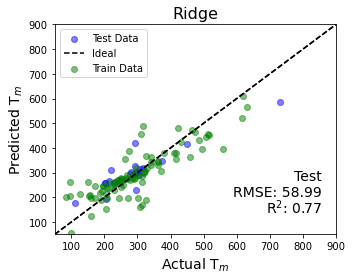

Root Mean squared error CV: 58.99
Coefficient of determination CV: 0.77
RMSE Train :62.62
R2 Train :0.73


In [47]:

errors_grid2 = []
for idx, (train, test) in enumerate(cv5.split(xtrain2)):
    x_cv_train = xtrain2.values[train]
    x_cv_test = xtrain2.values[test]
    
    y_cv_train = y.values[train]
    y_cv_test = y.values[test]
    
    model = lr_grid2.fit(x_cv_train,y_cv_train)
    y_pred = model.predict(xtrain2)
    y_pred_train = model.predict(x_cv_train)
    y_pred_test = model.predict(x_cv_test)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
    
    r2 = r2_score(y,y_pred)
    r2_test = r2_score(y_cv_test, y_pred_test)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    polt_parity3(y_cv_test,y_pred_test,y_cv_train,y_pred_train,label = 'Test')
    
    print("Root Mean squared error CV: %.2f" % rmse_test)
    print("Coefficient of determination CV: %.2f" % r2_test) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test,
             'r2_cv': r2_train,
             'rmse_train':rmse,
             'r2_train':r2}
    errors_grid2.append(error)

In [48]:
errors_grid2= pd.DataFrame(errors_grid2)
errors_grid2

,kfold,rmse_cv,rmse_test,r2_test,r2_cv,rmse_train,r2_train
0,1,64.306173,56.155581,0.590973,0.745908,62.704391,0.728839
1,2,61.061471,69.073504,0.764972,0.713800,62.730804,0.728611
2,3,61.246446,67.310198,0.643549,0.742669,62.495037,0.730647
3,4,57.951358,83.025051,0.517297,0.763487,63.709895,0.720073
4,5,63.480769,58.989144,0.771091,0.717838,62.616143,0.729602


In [49]:
errors_grid2.mean()[['rmse_test','r2_test','rmse_train','r2_train','r2_cv']]

rmse_test     66.910696
r2_test        0.657577
rmse_train    62.851254
r2_train       0.727554
r2_cv          0.736740
dtype: float64

In [50]:
X3 = xtest[sel_features]
X3

,Ni,Sn,Co,Cu,Numa,mass
0,50.0,13.5,0,0.0,3,65.42395
1,43.0,10.0,0,0.0,4,62.64990
2,45.3,14.3,0,4.5,4,66.14531
3,45.0,11.0,0,0.0,4,63.68770
4,50.0,8.0,1,0.0,4,61.95650


## Training set

In [44]:
lr_grid2.fit(xtrain2,y)

Ridge(alpha=6.48149920044076)

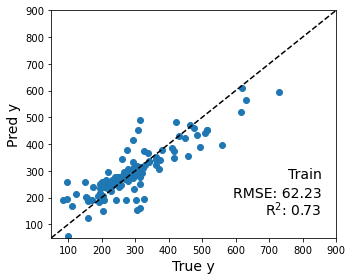

Root mean squared error: 62.23
Coefficient of determination: 0.73


In [45]:
y_pred = lr_grid2.predict(xtrain2)


rmse_train = np.sqrt(mean_squared_error(y, y_pred))
r2_train = r2_score(y, y_pred)

# Plot Parity plot
polt_parity2(y,y_pred,label="Train")

print("Root mean squared error: %.2f" % rmse_train)
print("Coefficient of determination: %.2f" % r2_train) 

## Test predictions

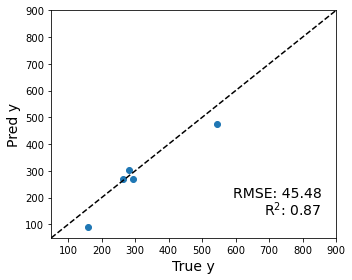

Root mean squared error: 45.48
Coefficient of determination: 0.872010


In [46]:
modellr = lr.fit(xtrain2,y)
ypred1 = modellr.predict(X3)
rmse_test1 = np.sqrt(mean_squared_error(ytest,ypred1))
r2_test1 = r2_score(ytest,ypred1)
polt_parity2(ytest,ypred1)
print("Root mean squared error: %.2f" % rmse_test1)
print("Coefficient of determination: %.6f" % r2_test1)

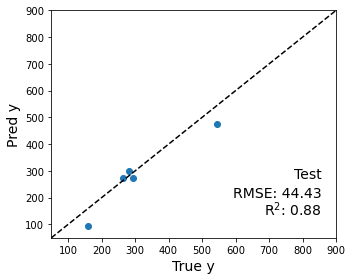

Root mean squared error: 44.43
Coefficient of determination: 0.877838


In [47]:
model = lr_grid2.fit(xtrain2,y)
ypred = model.predict(X3)
rmse_test = np.sqrt(mean_squared_error(ytest, ypred))
r2_test = r2_score(ytest, ypred)

# Plot Parity plot
polt_parity2(ytest,ypred,label="Test")

# print("Kernel parameters: %s"%(model.kernel_))
print("Root mean squared error: %.2f" % rmse_test)
print("Coefficient of determination: %.6f" % r2_test)

In [48]:
test_pre = pd.concat([data_test.loc[:, ['NiMn']], ytest, pd.DataFrame(ypred)], axis=1)
test_pre.rename(columns={'T': 'True', 0: 'predict'}, inplace=True)
test_pre

,NiMn,True,predict
0,Ni50Mn36.5Sn13.5,282.0,300.978065
1,Ni43Mn46Sn10Al1,262.5,274.829401
2,Ni45.3Mn35.9Cu4.5Sn14.3,159.0,93.282467
3,Ni45Mn39Fe5Sn11,295.0,272.356157
4,Ni50Mn41Sn8Co1,544.0,476.707505


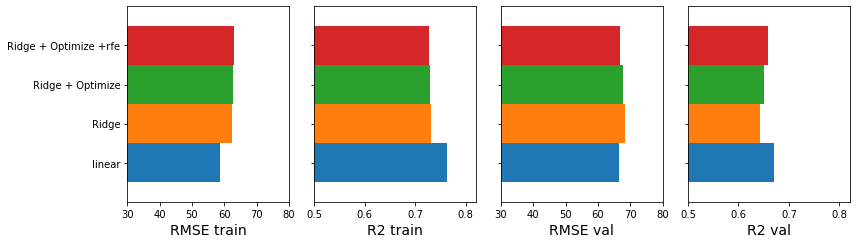

In [49]:
width = 0.1
labels = ['linear','Ridge','Ridge + Optimize','Ridge + Optimize +rfe']
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5), sharey=True)
    
for idx,e in enumerate([errors, error_lr2, errors_grid,errors_grid2]):
    rmse_test = e.mean()['rmse_test']
    r2_test = e.mean()['r2_test']
    rmse_train = e.mean()['rmse_train']
    r2_train = e.mean()['r2_train']
    
    ax3.barh(0 + width*(idx-1), rmse_test, height=width, label=labels[idx], align='center')
    ax4.barh(0 + width*(idx-1), r2_test, height=width, label=labels[idx], align='center')
    ax1.barh(0 + width*(idx-1), rmse_train, height=width, label=labels[idx], align='center')
    ax2.barh(0 + width*(idx-1), r2_train, height=width, label=labels[idx], align='center')
    
ax3.set_xlabel('RMSE val', fontsize=14)
ax4.set_xlabel('R2 val', fontsize=14)    
ax1.set_xlabel('RMSE train', fontsize=14)
ax2.set_xlabel('R2 train', fontsize=14)  

ax1.set_yticks([-0.1,0,0.1,0.2])
ax1.set_yticklabels(labels)

ax1.set_ylim(-0.2,0.3)
ax3.set_xlim(30,80)
ax4.set_xlim(0.5,0.82)
ax1.set_xlim(30,80)
ax2.set_xlim(0.5,0.82)

plt.tight_layout()
plt.show()

In [50]:
import shap

In [51]:
explainer = shap.Explainer(model.predict,xtrain2)
shap_values = explainer(xtrain2)

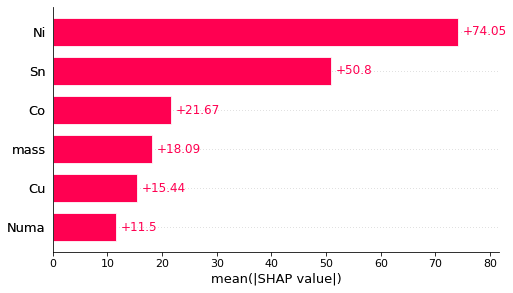

In [52]:
shap.plots.bar(shap_values,show = False)

<AxesSubplot:xlabel='SHAP value (impact on model output)'>

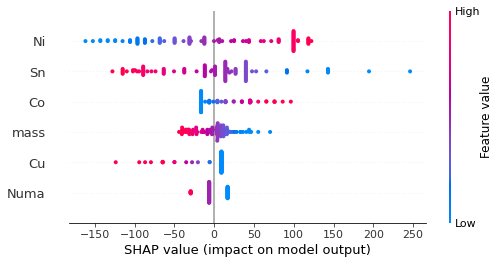

In [53]:
shap.plots.beeswarm(shap_values,show = False)